In [21]:
import pandas as pd
import numpy as np

### **1 - En primer lugar tenemos que leer la base de datos**

En nuestro caso es un csv y usaremos el método de pandas:
```Python
pd.read_csv("Aquí escribiremos donde está el archivo")
```


In [22]:
 df = pd.read_csv('data\ds_salaries.csv') #generalmente guardamos la base de datos en una variable df (dataframe)
# type(df)

Para comprobar que se ha cargado bien la base de datos con el método ".head" mostraremos las filas que introduzcamos en el paréntesis


In [7]:
df.head(3) 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


Al invocar las 3 primeras filas no es necesario que introduzcamos las letras __'pd'__ ya que estamos trabajando **sobre un data frame** y head() es un método propio de un objeto __dataframe__

###### Diferencia entre funciones y métodos en pandas:
- **Funciones de la librería (pd como prefijo)**: Cuando utilizas pandas, algunas funcionalidades son funciones globales que requieren usar el prefijo pd para invocarlas, como en el caso de pd.read_csv(). Esto se debe a que read_csv() es una función de pandas, y no es parte del DataFrame o Series. Necesitas usar pd para acceder a ella, ya que estás llamando a una función que está en el espacio de nombres de la librería pandas.
    ``` Python
    df = pd.read_csv('data\ds_salaries.csv')
    ```
- **Métodos del objeto DataFrame o Series**: En cambio, head() es un método de un objeto DataFrame o Series. Cuando creas un DataFrame al leer un archivo con pd.read_csv(), el objeto df se convierte en una instancia de la clase DataFrame, y dicha clase tiene métodos como head(), tail(), describe(), etc.

Como estos métodos pertenecen a la clase DataFrame, puedes llamarlos directamente sobre la instancia (df en este caso), sin necesidad de usar el prefijo pd.


In [13]:
df.columns #saber las columnas

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [17]:
df.shape #saber las dimensiones

(3755, 11)

In [19]:
df.dtypes #saber los tipos de datos

#siempre que veamos un objeto en un dtype es un string

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Ahora sabemos los encabezados, las dimensaiones de la DB y los tipos de datos

### 2 - **Saber que datos nulos tenemos aquí dentro:**

Para eso usaremos 
```Python 
df.isnull().sum() 
```
para saber la cantidad de dartos nulos que tenemos en cada columna

Los valores nulos se muestran como ***"NaN"*** que es una abreviatura de ***"Not a Number"***


Más adelante podremos usar algoritmos de vecinos kNN para arreglar estos valores solos, en resumen kNN nos vale para establecer grupos de vecinos, es un algortimo muy útil.


In [20]:
df.isnull().sum() #saber cuantos datos nulos hay en cada columnas

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### **3 - Revisar valores duplicados y eliminarlos o no**

Se eliminan o se mantienen a juicio del analista.

La funcion nos dirá las filas que se repiten todos los parámetros.

Se realiza con la línea:
```Python
df.duplicated().sum()
```
##### ***Sintaxis de __.duplicated()__
```Python
DataFrame.duplicated(subset=None, keep='first')
```
- **subset (opcional)**: Especifica las columnas que deben considerarse al buscar duplicados. Si no se proporciona, se consideran todas las columnas del DataFrame.Si quieres buscar duplicados basándote solo en algunas columnas, puedes pasar una lista de nombres de columnas.
- **keep (opcional)**: Determina qué duplicado(s) marcar como True (es decir, identificar como duplicado).
        'first' (predeterminado): Marca todas las ocurrencias como duplicadas excepto la primera.
        'last': Marca todas las ocurrencias como duplicadas excepto la última.
        False: Marca todas las ocurrencias de duplicados como duplicadas (incluyendo la primera).


In [9]:
df.duplicated().sum() # saber los valores duplicados


1171

Crear función para saber la cantidad de filas repetidas que tenemos ya que esta información tampoco nos va a ser muy útil.



In [10]:
duplicados=pd.DataFrame(df.value_counts())
duplicados[duplicados['count']>1]


count
work_year experience_level employment_type job_title            salary salary_currency salary_in_usd employee_residence remote_ratio company_location company_size       
2022      SE               FT              Data Scientist       191475 USD             191475        US                 100          US               M                21
                                                                141525 USD             141525        US                 100          US               M                21
2023      SE               FT              Data Engineer        252000 USD             252000        US                 0            US               M                13
                                                                129000 USD             129000        US                 0            US               M                13
2022      SE               FT              Data Engineer        130000 USD             130000        US                 0            US               M                12
...                                                                                                                                                                   ...
                                           Data Scientist       119300 USD             119300        US                 0            US               L                 2
2023      SE               FT              Data Quality Analyst 100000 USD             100000        US                 0            US               M                 2
                                                                80000  USD             80000         US                 0            US               M                 2
2022      EN               FT              Data Analyst         50000  USD             50000         US                 50           US               L                 2
2023      MI               FT              Data Analyst         85000  USD             85000         US                 0            US               M                 2

[544 rows x 1 columns]

In [23]:
#Eliminamos las filas duplicadas
df.drop_duplicates(inplace=True)
df.duplicated().sum() 


0

#### ***PRE-PROCESAMIENTO realizado***

#### EDA (Exploratory Data Analisys)

In [30]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


Una parte muy importante si no te dan ningún objetivo tenemos que hacernos preguntas importantes sobre los datos.
- En que país se cobra más 
- Que compañía paga más
- etc.

### Pregunta: ¿En que puesto se cobra más?


In [39]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


In [38]:
promedio_salario_por_empleo = df.groupby('job_title')['salary'].mean()
promedio_salario_ordenado_por_empleo = promedio_salario.sort_values(ascending=False)
promedio_salario_ordenado_por_empleo.head(3)


job_title
Head of Machine Learning          6.000000e+06
Principal Data Architect          3.000000e+06
Lead Machine Learning Engineer    2.548667e+06
Name: salary, dtype: float64

### Pregunta: País de residencia donde se cobra más

In [40]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


In [89]:
promdio_salario_por_pais = df.groupby('company_location')['salary'].mean()
promdio_salario_por_pais.sort_values(ascending=False).reset_index().round(2)




,company_location,salary
0,CL,30400000.00
1,HU,8800000.00
2,JP,3408666.67
3,ID,2107500.00
4,IN,1828315.74
...,...,...
67,SK,12000.00
68,MA,10000.00
69,AL,10000.00
70,BO,7500.00


### Pregunta: por que porcentaje promedio se aumenta el salario entre nivel de experiencia

In [43]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [32]:
# En primer lugar calcularemos la media agrupada a cada nivel de experiencia.
promedio_salario_experiencia = df.groupby('experience_level')['salary_in_usd'].mean()


#ordenamos los niveles de experiencia para el análisis:
orden_experiencia = ['EN', 'MI', 'SE', 'EX']

#re-indexamos el dataframe para ajustar según los niveles de experiencia
promedio_salario_experiencia = promedio_salario_experiencia.reindex(orden_experiencia)

#calculamos el porcentaje de aumento entre niveles consecutivos
porcentajes_aumento = promedio_salario_experiencia.pct_change() * 100
#Calcula el porcentaje de cambio entre los salarios promedio de niveles consecutivos.

#calcular el porcentaje promedio de aumento
porcentaje_promedio_aumento = porcentajes_aumento.mean()
print(f"El porcentaje promedio de aumento entre niveles de experiencia es {porcentaje_promedio_aumento:.2f}%")



El porcentaje promedio de aumento entre niveles de experiencia es 38.49%


#### __Explicación de la función '.pct_change()__
La función .pct_change() de Pandas se utiliza para calcular el cambio porcentual entre los elementos de una serie o columna de un DataFrame. Es decir, compara cada valor con el valor anterior y devuelve el porcentaje de cambio entre ambos.
``` Python
Series.pct_change(periods=1, fill_method='pad', limit=None, freq=None)
```
- **periods**: El número de períodos entre los que quieres calcular el cambio porcentual. Por defecto, es 1 (compara cada valor con el valor inmediatamente anterior).
- **fill_method**: Método para rellenar valores nulos antes de calcular el cambio (por defecto es 'pad', que rellena con el último valor válido).
- **limit**: El número máximo de valores nulos a llenar si es necesario.
- **freq**: Frecuencia para calcular el cambio si estás trabajando con datos de series temporales.
##### __Ejemplo básico__ 
Imagina que tienes una serie de salarios en diferentes años y quieres ver cómo ha cambiado el salario año a año.
``` Python
import pandas as pd

# Creamos una Serie de salarios
salarios = pd.Series([50000, 55000, 58000, 60000, 63000])

# Calculamos el cambio porcentual entre cada año
cambio_porcentual = salarios.pct_change()
print(cambio_porcentual)
```

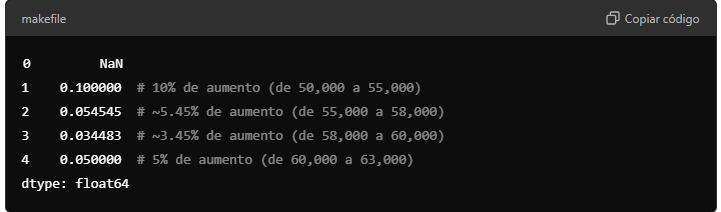

El primer valor será NaN porque no hay un valor anterior con el que compararlo. Los siguientes valores representan el porcentaje de aumento o disminución con respecto al valor inmediatamente anterior.
##### Ejemplo con más de un período
Si quisieras calcular el cambio porcentual comparando con dos períodos anteriores (por ejemplo, comparando el salario actual con el de hace dos años):
``` Python
cambio_porcentual = salarios.pct_change(periods=2)
print(cambio_porcentual)
```
Resultado:

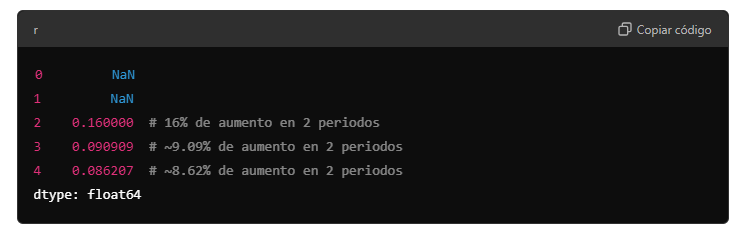



In [55]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


### Pregunta: en que pais se cobra  mas por tipo de empleo?

### **IMPORTANTE** FUNCIÓN AGG (describir funcion)


In [18]:
pd.set_option('display.max_rows',20) #esto es pa ver todo

como lo ha hecho jorge
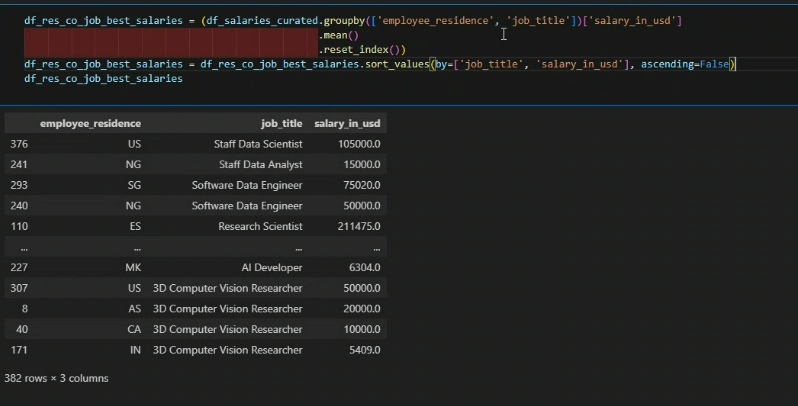

In [26]:
df.groupby(['employee_residence','job_title']).agg({'salary_in_usd':'mean'}).round(2).sort_values(by=['job_title','salary_in_usd'],ascending=False).reset_index()

,employee_residence,job_title,salary_in_usd
0,US,Staff Data Scientist,105000.0
1,NG,Staff Data Analyst,15000.0
2,SG,Software Data Engineer,75020.0
3,NG,Software Data Engineer,50000.0
4,ES,Research Scientist,211475.0
...,...,...,...
377,MK,AI Developer,6304.0
378,US,3D Computer Vision Researcher,50000.0
379,AS,3D Computer Vision Researcher,20000.0
380,CA,3D Computer Vision Researcher,10000.0


In [78]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


### Pregunta: ¿El nivel de  experiencia es proporcional al salario 

In [79]:
df.groupby('experience_level').agg({'salary_in_usd':'mean'}).round(2).sort_values(by=['salary_in_usd','experience_level'],ascending=False)

,salary_in_usd
experience_level,
EX,191078.21
SE,153897.44
MI,101828.78
EN,72648.69


In [86]:
df.groupby('experience_level')['salary_in_usd'].mean().round(2).sort_values(ascending=False).reset_index()
#misma forma que el anterior, si no pusieramos el 'reset_index()' nos daria como resultado un "Series"

,experience_level,salary_in_usd
0,EX,191078.21
1,SE,153897.44
2,MI,101828.78
3,EN,72648.69


In [80]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


### Pregunta: cuanto se cobra de media por cada nivel de experiencia y cada posición?

In [ ]:
df.groupby([''])

### Pregunta: En qué país hay compañías más grandes?

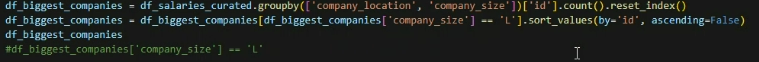

### Pregunta:  cuáles se repiten más en este set de datos, las empresas medianas, grandes o pequeñas

In [8]:
df['company_size'].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

### Pregunta: De que país son la mayoria de compañías?